#**Machine Learning - Homework1**
# *Classification function*
### Gianluca Pulicati 1708686











## Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import tree
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import *


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        pass
        #print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    ax.set_ylim(len(classes)-0.5, -0.5)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

# Open required dataset files and print some infos

In [ ]:
functions_dframe = pd.read_json("/content/drive/My Drive/dataset.json", lines =True).drop_duplicates(subset=['lista_asm'])
labels = ['encryption', 'math', 'sort', 'string']
labels_array = np.array([str(c) for c in labels])

### Print some information about dataset ###

print('Printing some infos ... \n')
class_names = functions_dframe.columns
print(class_names)

## In a clearer way... ##
#class_names_clear = np.array([str(c) for c in class_names])
#print(class_names_clear)

print('\nShape of the dataset:')
print(functions_dframe.shape)


#only_semantic = functions_dframe['semantic']
#print(only_semantic.shape[0])
#functions_dframe.head()
#print(functions_dframe.iloc[300:349])

Printing some infos ... 

Index(['id', 'semantic', 'lista_asm', 'cfg'], dtype='object')

Shape of the dataset:
(6073, 4)


# Vectorize 'lista_ams' functions

In [ ]:
vectorizer = CountVectorizer(token_pattern="['][a-z]+\s")

X_all = vectorizer.fit_transform(functions_dframe['lista_asm'])
Y_all = functions_dframe['semantic']

## Print the function's names captured by the pattern ##
#print(vectorizer.get_feature_names())


# Split Dataset

**test_size = 25%**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_all, Y_all, test_size=0.25, random_state=42)

print("Size of training set 'X', X_train: %d" %X_train.shape[0])
print("Size of testing set 'X', X_test: %d\n" %X_test.shape[0])

Size of training set 'X', X_train: 4554
Size of testing set 'X', X_test: 1519



# Model creation, fitting and evaluation

Computational training time =   0.5356130000000014


              precision    recall  f1-score   support

  encryption       0.98      0.97      0.98       282
        math       0.98      1.00      0.99       623
        sort       0.92      0.83      0.87       126
      string       0.98      0.99      0.98       488

    accuracy                           0.97      1519
   macro avg       0.96      0.95      0.95      1519
weighted avg       0.97      0.97      0.97      1519



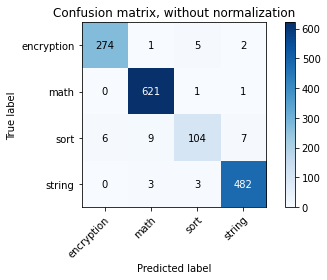

In [ ]:
time_start = time.clock()
model = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
time_elapsed = (time.clock() - time_start)
print("Computational training time =  ", time_elapsed)
print("\n")

prediction = model.predict(X_test)

print(classification_report(y_test,prediction))
plot_confusion_matrix(y_test, prediction, classes=labels_array, normalize=False)




#model = BernoulliNB().fit(X_train, y_train)
#model = tree.DecisionTreeClassifier().fit(X_train, y_train)
#model = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)

# Prediction

In [ ]:
blindset = pd.read_json("/content/drive/MyDrive/blindtest.json", lines =True)

### Print some information about dataset ###

print('Printing some infos ... \n')
class_names = blindset.columns
print(class_names)

print('\nShape of the dataset:')
print(blindset.shape)

Printing some infos ... 

Index(['id', 'lista_asm', 'cfg'], dtype='object')

Shape of the dataset:
(757, 3)


In [ ]:
X_blind = vectorizer.transform(blindset['lista_asm'])
Y_blind = model.predict(X_blind)

with open('/content/drive/MyDrive/out.txt', 'w') as writefile:
    for element in Y_blind:
        writefile.write(element + '\n')